In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
!wget -P dataset/ "https://www.dropbox.com/scl/fi/mr8ujriumhojv3vnxazsl/twitter_sentiment_analysis.zip?rlkey=p0yp8f6cpwrik8ydc3k67h2mq&st=yu311b67&dl=1"

--2025-07-11 21:16:28--  https://www.dropbox.com/scl/fi/mr8ujriumhojv3vnxazsl/twitter_sentiment_analysis.zip?rlkey=p0yp8f6cpwrik8ydc3k67h2mq&st=yu311b67&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc057a3bb38f1c3100a7f9542b56.dl.dropboxusercontent.com/cd/0/inline/CtRNxxZYMne70zz_e36DUpCWUDVq_cx6b1OJfVs0xZwOig52V2WKhen7ZomOdm0X4XPgEw1IE-CrQwXEJVTBVjgYAfhn3J1CtfGpyCtem5JDWFGKPScqZiCuu-pAyJUn1xURYDPiP0KMf0Cz6lFLxUYD/file?dl=1# [following]
--2025-07-11 21:16:29--  https://uc057a3bb38f1c3100a7f9542b56.dl.dropboxusercontent.com/cd/0/inline/CtRNxxZYMne70zz_e36DUpCWUDVq_cx6b1OJfVs0xZwOig52V2WKhen7ZomOdm0X4XPgEw1IE-CrQwXEJVTBVjgYAfhn3J1CtfGpyCtem5JDWFGKPScqZiCuu-pAyJUn1xURYDPiP0KMf0Cz6lFLxUYD/file?dl=1
Resolving uc057a3bb38f1c3100a7f9542b56.dl.dropboxusercontent.com (uc057a3bb38f1c3100a7f9542b56.dl

In [3]:
!mv /content/dataset/"twitter_sentiment_analysis.zip?rlkey=p0yp8f6cpwrik8ydc3k67h2mq&st=yu311b67&dl=1" /content/dataset/twitter.zip


In [4]:
!unzip /content/dataset/twitter.zip

Archive:  /content/dataset/twitter.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [5]:
data=pd.read_csv("/content/twitter_training.csv")
data.tail()

val = pd.read_csv("/content/twitter_validation.csv")

In [6]:
data.shape

(74681, 4)

In [7]:
train_data=data
val_data = val

In [8]:
data['Borderlands'].value_counts()

,count
Borderlands,
Microsoft,2400
MaddenNFL,2400
TomClancysRainbowSix,2400
LeagueOfLegends,2394
CallOfDuty,2394
Verizon,2382
CallOfDutyBlackopsColdWar,2376
ApexLegends,2376
Facebook,2370


In [9]:
data['2401'].value_counts()

,count
2401,
9200,6
9199,6
2402,6
2403,6
2404,6
...,...
2418,6
2417,6
2416,6


In [10]:
data.columns=['id','information','type','text']
data.head()

val.columns=['id','information','type','text']
val.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [11]:
data.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [12]:
val_data.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [13]:
irrelevant_rows = data[data['type'].str.lower() == 'irrelevant']

irrelevant_rows

,id,information,type,text
101,2418,Borderlands,Irrelevant,Appreciate the (sonic) concepts / praxis Valen...
102,2418,Borderlands,Irrelevant,Appreciate the (sound) concepts / practices th...
103,2418,Borderlands,Irrelevant,Evaluate the (sound) concepts / concepts of Va...
104,2418,Borderlands,Irrelevant,Appreciate the (sonic) concepts / praxis Valen...
105,2418,Borderlands,Irrelevant,Appreciate by the ( sonic ) electronic concept...
...,...,...,...,...
74034,9085,Nvidia,Irrelevant,This is all based on last quarter's earnings. ...
74035,9085,Nvidia,Irrelevant,Let's see how well they handle the next one wh...
74036,9085,Nvidia,Irrelevant,Good on them. This stuff all based on earnings...
74037,9085,Nvidia,Irrelevant,9 Good idea for them. This is all based on ear...


To prepare the data for the text analysis an additional row was created using the method of str.lower. However, as there were some texts with only numerical values (such as one that only had a 2 as the tweet) an additional function was used for transforming all the data to string.

Then, a regex expression erased the special characters as it is common to have digitation problems on Twitter.

In [14]:
#Text transformation
train_data=data
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

Bar-plotting

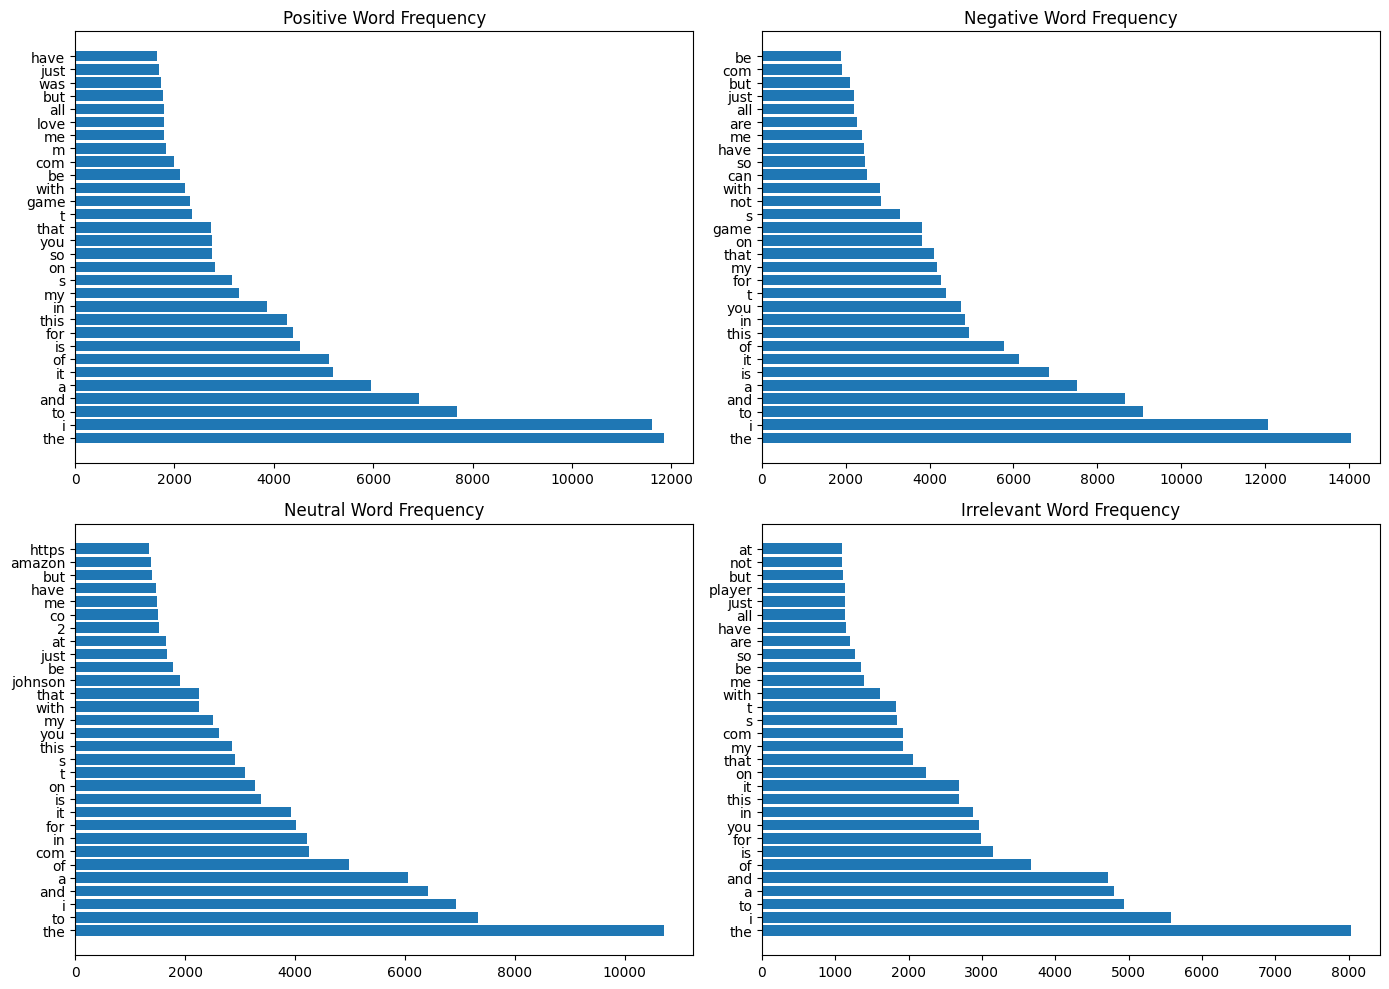

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

data.columns = ['id', 'information', 'type', 'text','lower']

positivedata = data[data['type'] == 'Positive']['lower'].dropna().astype(str)
negdata = data[data['type'] == 'Negative']['lower'].dropna().astype(str)
neutraldata = data[data['type'] == 'Neutral']['lower'].dropna().astype(str)
irrelevantdata = data[data['type'] == 'Irrelevant']['lower'].dropna().astype(str)

positivedata_words = ' '.join(positivedata).split()
negdata_words = ' '.join(negdata).split()
neutraldata_words = ' '.join(neutraldata).split()
irrelevantdata_words = ' '.join(irrelevantdata).split()

positivedata_common_words = Counter(positivedata_words).most_common(30)
negdata_common_words = Counter(negdata_words).most_common(30)
neutraldata_common_words = Counter(neutraldata_words).most_common(30)
irrelevantdata_common_words = Counter(irrelevantdata_words).most_common(30)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words])
axes[0, 0].set_yticks(range(len(positivedata_common_words)))
axes[0, 0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0, 0].set_title('Positive Word Frequency')

axes[0, 1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words])
axes[0, 1].set_yticks(range(len(negdata_common_words)))
axes[0, 1].set_yticklabels([word for word, _ in negdata_common_words])
axes[0, 1].set_title('Negative Word Frequency')

axes[1, 0].barh(range(len(neutraldata_common_words)), [count for _, count in neutraldata_common_words])
axes[1, 0].set_yticks(range(len(neutraldata_common_words)))
axes[1, 0].set_yticklabels([word for word, _ in neutraldata_common_words])
axes[1, 0].set_title('Neutral Word Frequency')

axes[1, 1].barh(range(len(irrelevantdata_common_words)), [count for _, count in irrelevantdata_common_words])
axes[1, 1].set_yticks(range(len(irrelevantdata_common_words)))
axes[1, 1].set_yticklabels([word for word, _ in irrelevantdata_common_words])
axes[1, 1].set_title('Irrelevant Word Frequency')

plt.tight_layout()
plt.show()


word Cloud

In [16]:
!pip install wordcloud
from wordcloud import WordCloud

Positive

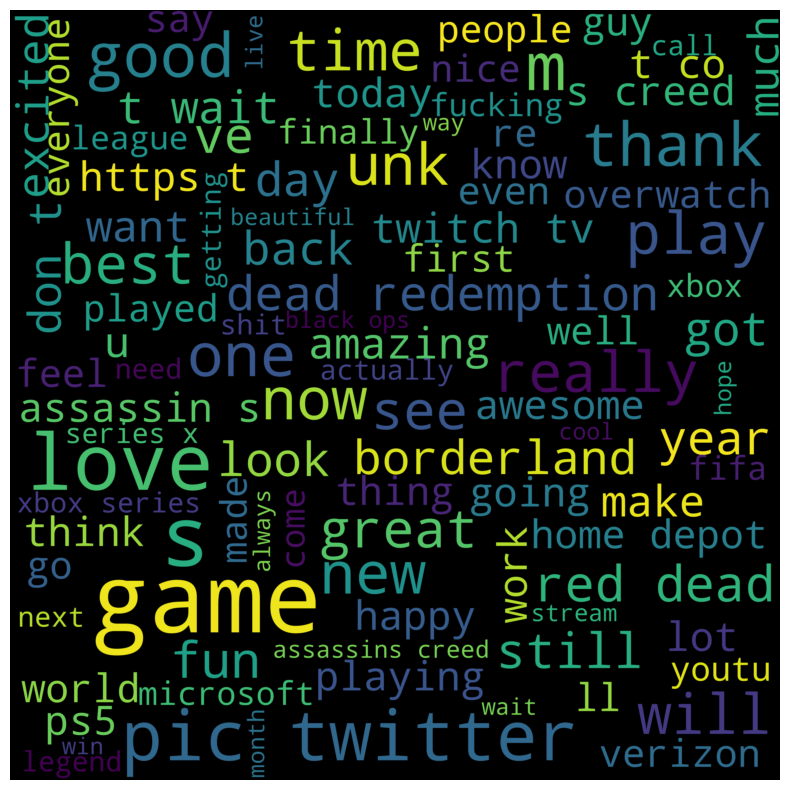

In [17]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

the positive one showing good words

Negative

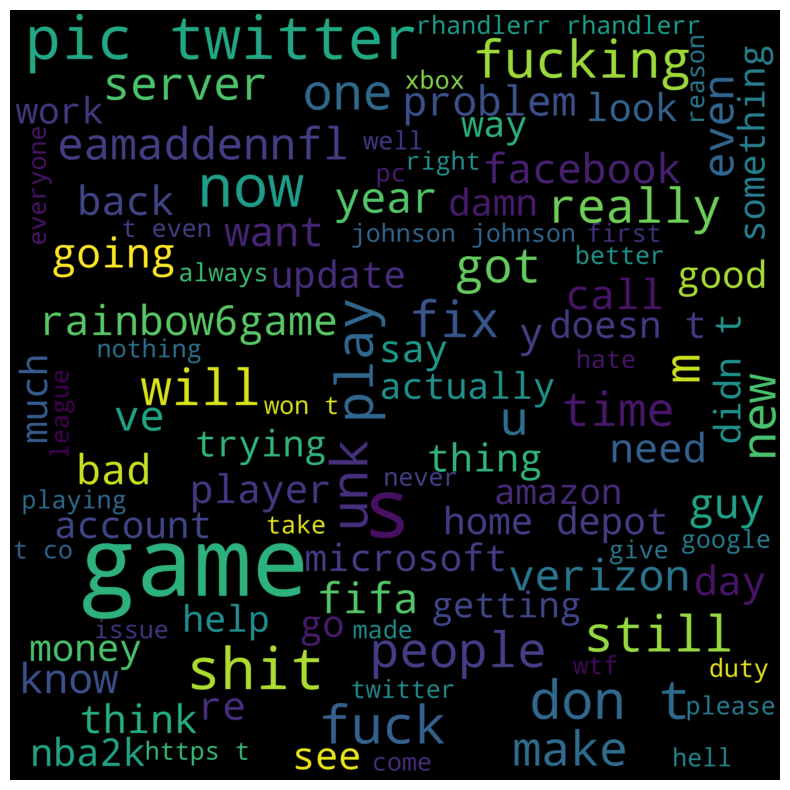

In [18]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

the negative one showing some curse words.. damn  some very league words

Neutral

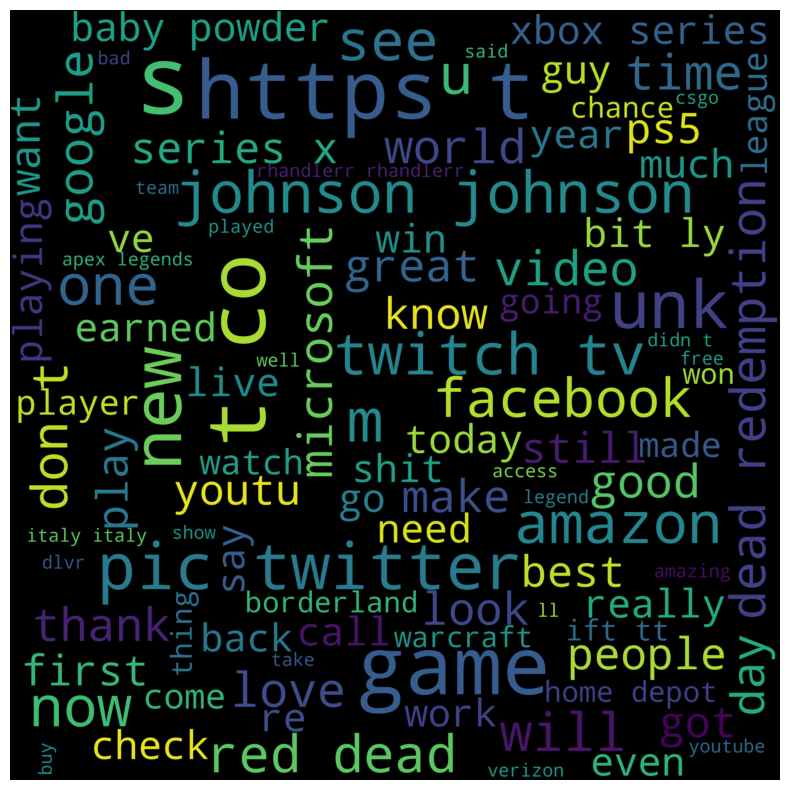

In [19]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The nuetral ones are vey normal.. meh

Irrelevant

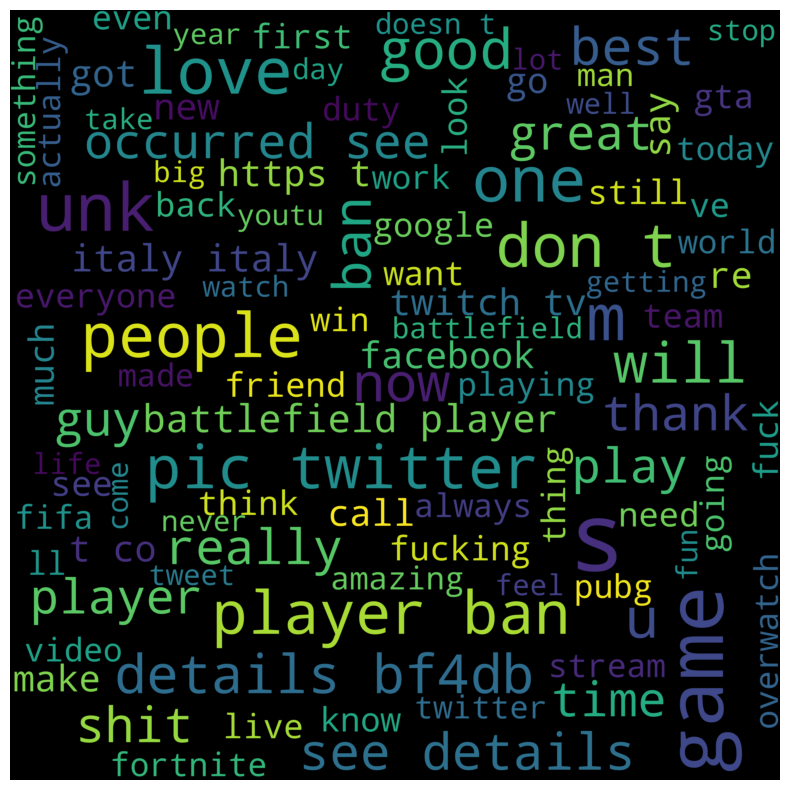

In [20]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

the name says it all

In [21]:
#Count information per category
plot1=data.groupby(by=["information","type"]).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


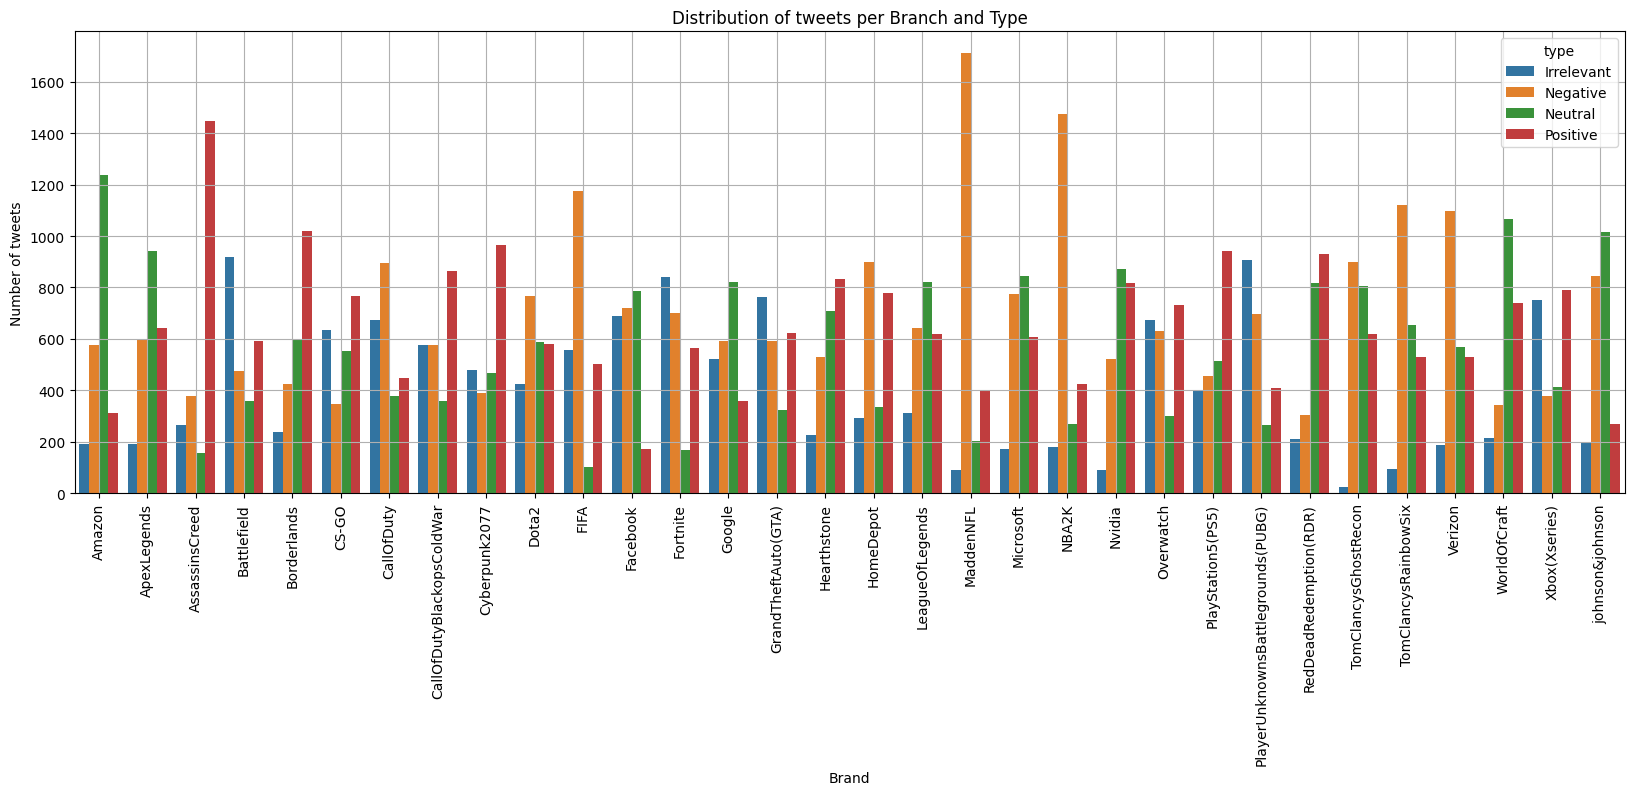

In [22]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

In [23]:
#the following barplot shows that for games such as MaddenNFL
#and NBA2K the number of negative tweets is the highest while on the other brands the trend is different.

Analysis

In [24]:
#lets check how many unique words are here?

from nltk import word_tokenize
nltk.download('punkt_tab')



tokens_text = [word_tokenize(str(word)) for word in data['lower']]
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens:", len(set(tokens_counter)))


#so it has total of 30,426 unique words

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Number of tokens: 30436


In [25]:
tokens_text[9]

['2010',
 'so',
 'i',
 'spent',
 'a',
 'few',
 'hours',
 'making',
 'something',
 'for',
 'fun',
 'if',
 'you',
 'don',
 't',
 'know',
 'i',
 'am',
 'a',
 'huge',
 'rhandlerr',
 'fan',
 'and',
 'maya',
 'is',
 'one',
 'of',
 'my',
 'favorite',
 'characters',
 'so',
 'i',
 'decided',
 'to',
 'make',
 'myself',
 'a',
 'wallpaper',
 'for',
 'my',
 'pc',
 'here',
 'is',
 'the',
 'original',
 'image',
 'versus',
 'the',
 'creation',
 'i',
 'made',
 'enjoy',
 'pic',
 'twitter',
 'com',
 'mlsi5wf9jg']

In [26]:
#Choosing english stopwords
nltk.download('stopwords')


stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

Building Models

In [27]:
#logistic Regression Model

#Initial Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 3) #analysis of three words at a time
)

In [28]:
#train_test_split

from sklearn.model_selection import train_test_split
reviews_train, reviews_test = train_test_split(data, test_size=0.2, random_state=42)

In [29]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'m", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [30]:
X_train_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1838596 stored elements and shape (59744, 601726)>

In [31]:
X_test_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 366718 stored elements and shape (14937, 601726)>

In [32]:
#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [33]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]


#egative and positive are the most registered while the irrelevant is the lowest.

,count
type,
Negative,0.299324
Positive,0.284796
Neutral,0.237732
Irrelevant,0.178148


In [34]:
# !pip install optuna
# import optuna


# # If needed, split a validation set
# X_train_opt, X_val_opt, y_train_opt, y_val_opt = train_test_split(X_train_bow, y_train_bow, test_size=0.2, random_state=42)

# def objective(trial):
#     C = trial.suggest_loguniform('C', 1e-4, 10)
#     solver = trial.suggest_categorical('solver', ['liblinear', 'saga', 'lbfgs', 'newton-cg'])
#     max_iter = trial.suggest_int('max_iter', 100, 1000)

#     model = LogisticRegression(C=C, solver=solver, max_iter=max_iter)

#     model.fit(X_train_opt, y_train_opt)
#     preds = model.predict(X_val_opt)
#     accuracy = accuracy_score(y_val_opt, preds)

#     return accuracy

# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)

# print("Best trial:")
# print(study.best_trial)

# best_params = study.best_params


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# I got the params from optune which is commented out. U can remove the comment and run the code


best_params = {
    'C': 1.1077033544845254,
    'max_iter': 394,
    'solver': 'newton-cg'
}

model_final = LogisticRegression(**best_params)
model_final.fit(X_train_bow, y_train_bow)

LogisticRegression(C=1.1077033544845254, max_iter=394, solver='newton-cg')

In [37]:
test_pred = model_final.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  89.86409586931781


In [38]:
#validation
X_val_bow = bow_counts.transform(val.lower)
y_val_bow = val['type']

In [39]:
y_val_bow = val['type']
Val_pred_2 = model_final.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred_2) * 100)

Accuracy:  98.3983983983984


In [47]:
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


def preprocess_text(text):

    if not isinstance(text, str):
        text = str(text) # Ensure text is a string
    text = text.lower() # Lowercase the text
    text = re.sub('[^A-Za-z0-9 ]+', ' ', text) # Remove special characters
    return text

def get_prediction_from_user_input(model, vectorizer, class_labels=None):

    print("\n--- Sentiment Prediction Query ---")
    user_input_text = input("Enter the text you want to analyze: ")

    # Preprocess the user's input
    processed_text = preprocess_text(user_input_text)

    # Transform the preprocessed text using the SAME fitted vectorizer
    # The vectorizer expects a list of documents, so wrap the single text in a list.
    transformed_text = vectorizer.transform([processed_text])

    # Make the prediction
    prediction = model.predict(transformed_text)

    # If you have class labels, map the numerical prediction to a human-readable label
    if class_labels and isinstance(prediction[0], (int, np.integer)):
        try:
            predicted_label = class_labels[prediction[0]]
        except IndexError:
            predicted_label = f"Unknown class (raw prediction: {prediction[0]})"
    else:
        # If prediction[0] is already the label string or no mapping is provided
        predicted_label = prediction[0]

    print(f"Original Text: \"{user_input_text}\"")
    print(f"Processed Text: \"{processed_text}\"")
    print(f"Predicted Sentiment: {predicted_label}")

    # You can also show prediction probabilities if your model supports it
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(transformed_text)
        print(f"Prediction Probabilities: {probabilities[0]}")
        if class_labels:
            print("  Probabilities by Class:")
            for i, prob in enumerate(probabilities[0]):
                print(f"    {class_labels[i]}: {prob:.4f}")


sentiment_labels = ['Irrelevant', 'Negative', 'Neutral', 'Positive']

# Call the function to start the interactive prediction
get_prediction_from_user_input(model_final, bow_counts, sentiment_labels)


--- Sentiment Prediction Query ---
Enter the text you want to analyze: Chumu
Original Text: "Chumu"
Processed Text: "chumu"
Predicted Sentiment: Positive
Prediction Probabilities: [0.15975223 0.29639545 0.21389738 0.32995494]
  Probabilities by Class:
    Irrelevant: 0.1598
    Negative: 0.2964
    Neutral: 0.2139
    Positive: 0.3300
